**OASIS INFOBYTE INTERNSHIP - AUGUST SEPTEMBER 2023**\
**TASK - SALES PREDICTION**\
**NINAD NILESH SUGANDHI**

1. [Importing Libraries](#importing_libraries)
2. [Loading Data](#loading_data)
3. [Data Preprocessing](#data_preprocessing)
4. [EDA](#eda) 📊
5. [Modeling](#modeling)\
    5.1. [Linear Regression](#lr)\
    5.2. [Decision Tree Regressor](#dtr)\
    5.3. [Random Forest Regressor](#rfr)
6. [Conclusion](#conclusion)

<a id="importing_libraries"></a>
**1. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import itertools
import math
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
from wordcloud import WordCloud

<a id="loading_data"></a>
**2. Loading Data**

In [2]:
df = pd.read_csv("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\OASIS INFOBYTE PROJECTS\\Advertising.csv", encoding="latin-1")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<a id="data_preprocessing"></a>
**3. Data Preprocessing**

In [3]:
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.tail(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
df.shape

(200, 5)

In [9]:
df.size

1000

In [11]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [20]:
df.empty

False

In [21]:
df.index

RangeIndex(start=0, stop=200, step=1)

In [22]:
df.max()

Unnamed: 0    200.0
TV            296.4
Radio          49.6
Newspaper     114.0
Sales          27.0
dtype: float64

In [23]:
df.min()

Unnamed: 0    1.0
TV            0.7
Radio         0.0
Newspaper     0.3
Sales         1.6
dtype: float64

In [24]:
df.mean()

Unnamed: 0    100.5000
TV            147.0425
Radio          23.2640
Newspaper      30.5540
Sales          14.0225
dtype: float64

In [25]:
df.median()

Unnamed: 0    100.50
TV            149.75
Radio          22.90
Newspaper      25.75
Sales          12.90
dtype: float64

In [27]:
df.mode()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,17.2,4.1,8.7,9.7
1,2,76.4,5.7,9.3,NaN
2,3,109.8,NaN,25.6,NaN
3,4,177.0,NaN,NaN,NaN
4,5,184.9,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [29]:
df.values

array([[  1. , 230.1,  37.8,  69.2,  22.1],
       [  2. ,  44.5,  39.3,  45.1,  10.4],
       [  3. ,  17.2,  45.9,  69.3,   9.3],
       [  4. , 151.5,  41.3,  58.5,  18.5],
       [  5. , 180.8,  10.8,  58.4,  12.9],
       [  6. ,   8.7,  48.9,  75. ,   7.2],
       [  7. ,  57.5,  32.8,  23.5,  11.8],
       [  8. , 120.2,  19.6,  11.6,  13.2],
       [  9. ,   8.6,   2.1,   1. ,   4.8],
       [ 10. , 199.8,   2.6,  21.2,  10.6],
       [ 11. ,  66.1,   5.8,  24.2,   8.6],
       [ 12. , 214.7,  24. ,   4. ,  17.4],
       [ 13. ,  23.8,  35.1,  65.9,   9.2],
       [ 14. ,  97.5,   7.6,   7.2,   9.7],
       [ 15. , 204.1,  32.9,  46. ,  19. ],
       [ 16. , 195.4,  47.7,  52.9,  22.4],
       [ 17. ,  67.8,  36.6, 114. ,  12.5],
       [ 18. , 281.4,  39.6,  55.8,  24.4],
       [ 19. ,  69.2,  20.5,  18.3,  11.3],
       [ 20. , 147.3,  23.9,  19.1,  14.6],
       [ 21. , 218.4,  27.7,  53.4,  18. ],
       [ 22. , 237.4,   5.1,  23.5,  12.5],
       [ 23. ,  13.2,  15.9,  49

In [31]:
df.value_counts()

Unnamed: 0  TV     Radio  Newspaper  Sales
1           230.1  37.8   69.2       22.1     1
138         273.7  28.9   59.7       20.8     1
128         80.2   0.0    9.2        8.8      1
129         220.3  49.0   3.2        24.7     1
130         59.6   12.0   43.1       9.7      1
                                             ..
70          216.8  43.9   27.2       22.3     1
71          199.1  30.6   38.7       18.3     1
72          109.8  14.3   31.7       12.4     1
73          26.8   33.0   19.3       8.8      1
200         232.1  8.6    8.7        13.4     1
Length: 200, dtype: int64

In [12]:
df.duplicated

<bound method DataFrame.duplicated of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [14]:
df.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [15]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [18]:
correlation = df.corr()
print("Correlation: \n", correlation)

Correlation: 
             Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000


In [19]:
covariance = df.cov()
print("Covariance: \n", covariance)

Covariance: 
              Unnamed: 0           TV       Radio   Newspaper       Sales
Unnamed: 0  3350.000000    88.027387  -95.110050 -195.311558  -15.587186
TV            88.027387  7370.949893   69.862492  105.919452  350.390195
Radio        -95.110050    69.862492  220.427743  114.496979   44.635688
Newspaper   -195.311558   105.919452  114.496979  474.308326   25.941392
Sales        -15.587186   350.390195   44.635688   25.941392   27.221853


In [32]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [35]:
description = df.describe().T.style.background_gradient(
    cmap='RdYlGn',  # colormap
    low=0, high=1,   # range of colors for the gradient
    axis=None        # gradient across the entire dataFrame
)

# styling attributes
styled_description = description.set_properties(**{'font-size': '10pt', 'text-align': 'center'}).bar(subset=['mean'], color='#FFA07A')

styled_description

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
TV,200.000000,147.042500,85.854236,0.700000,74.375000,149.750000,218.825000,296.400000
Radio,200.000000,23.264000,14.846809,0.000000,9.975000,22.900000,36.525000,49.600000
Newspaper,200.000000,30.554000,21.778621,0.300000,12.750000,25.750000,45.100000,114.000000
Sales,200.000000,14.022500,5.217457,1.600000,10.375000,12.900000,17.400000,27.000000


<a id="eda"></a>
**4. EDA 📊**

In [39]:
numeric_cols = ['TV', 'Radio', 'Newspaper', 'Sales']

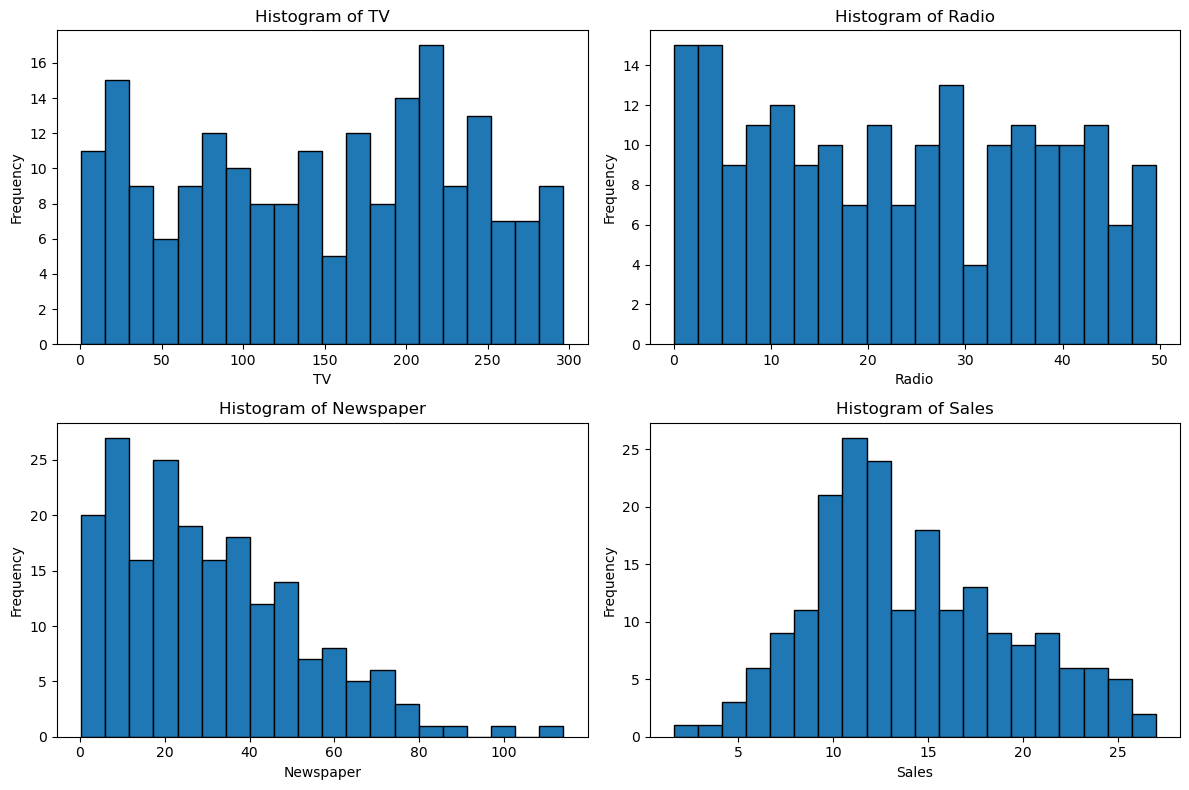

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plotting histograms for numeric features
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.hist(df[col], bins=20, edgecolor='k')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()
plt.show()

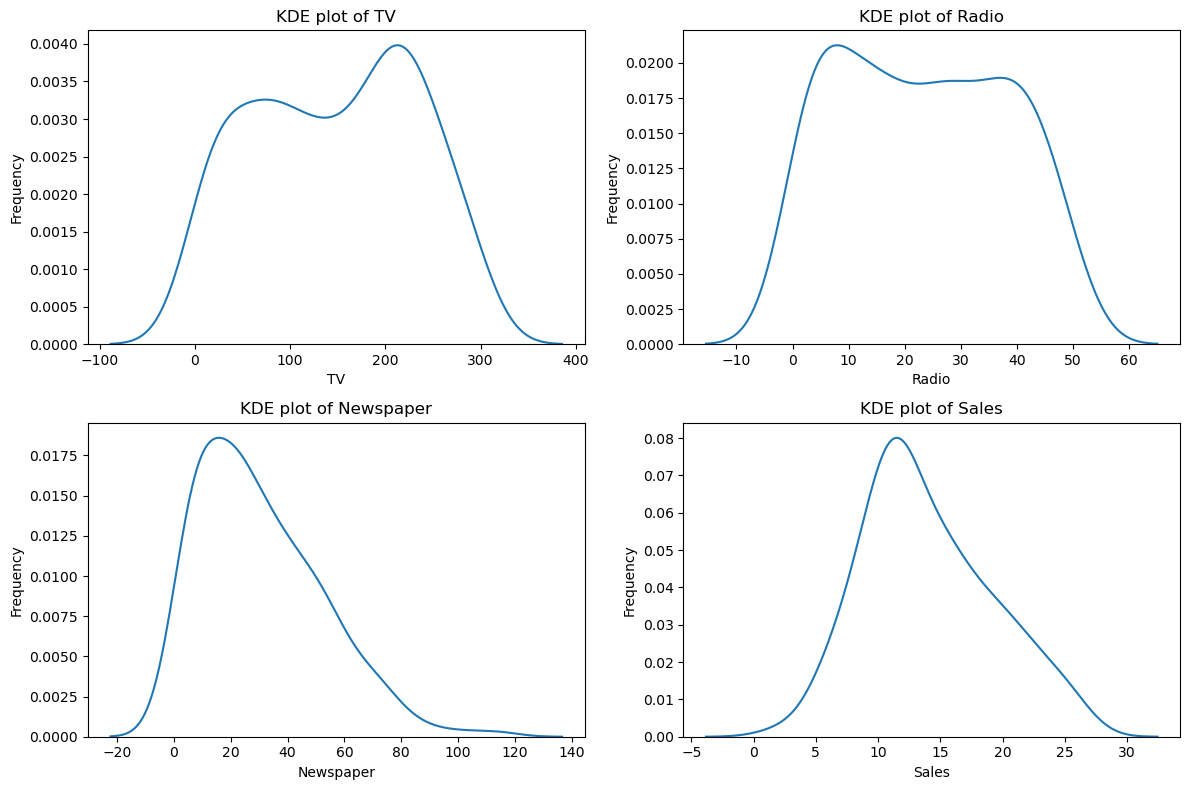

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plotting KDE plots for numeric features
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.kdeplot(data=df, x=col, ax=ax)
    ax.set_title(f'KDE plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()
plt.show()

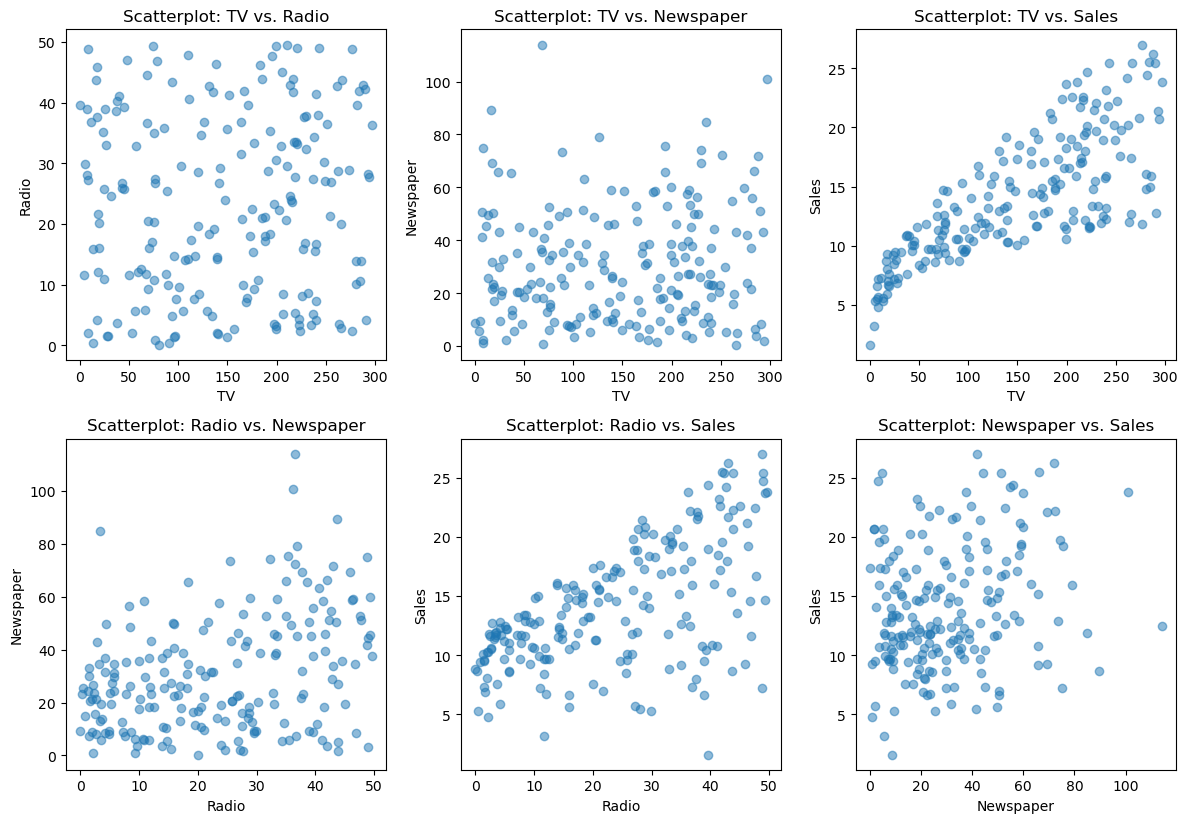

In [44]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

combinations = list(itertools.combinations(numeric_cols, 2))
num_combinations = len(combinations)
axes = axes.flatten()

for i, (col1, col2) in enumerate(combinations):
    ax = axes[i]
    ax.scatter(df[col1], df[col2], alpha=0.5)
    ax.set_title(f'Scatterplot: {col1} vs. {col2}')
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)

for i in range(num_combinations, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

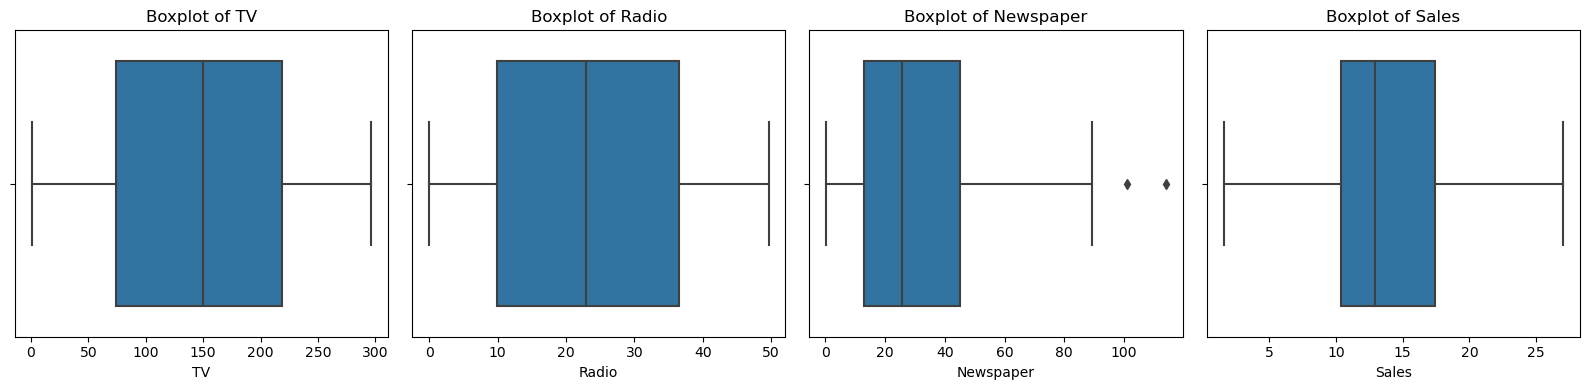

In [43]:
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(16, 4))

# Plotting boxplots for numeric features
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)

# Adjusting layout
plt.tight_layout()
plt.show()

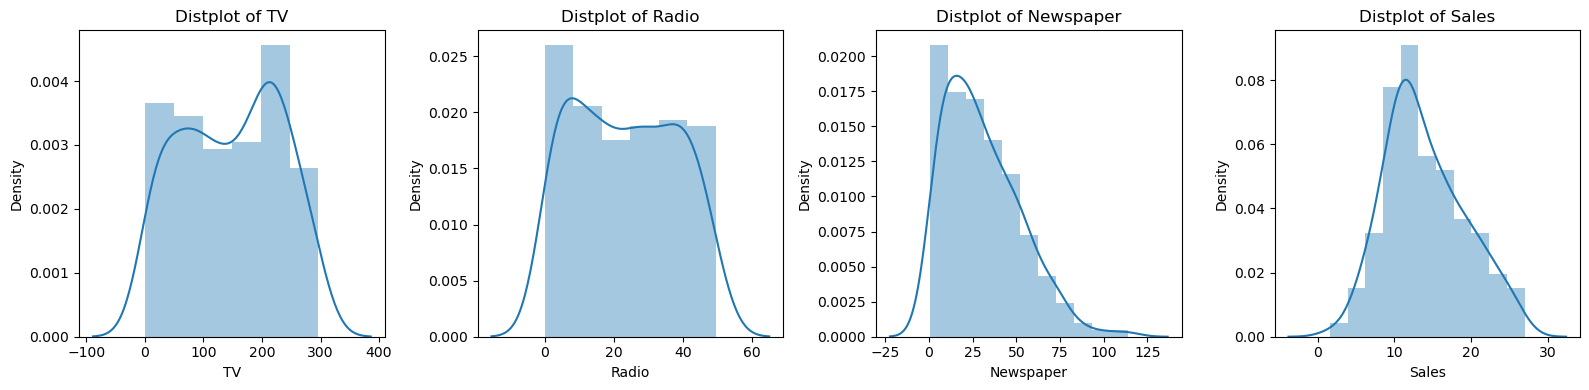

In [55]:
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(16, 4))

# Plotting distplots for numeric features
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.distplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distplot of {col}')
    ax.set_xlabel(col)

# Adjusting layout
plt.tight_layout()
plt.show()

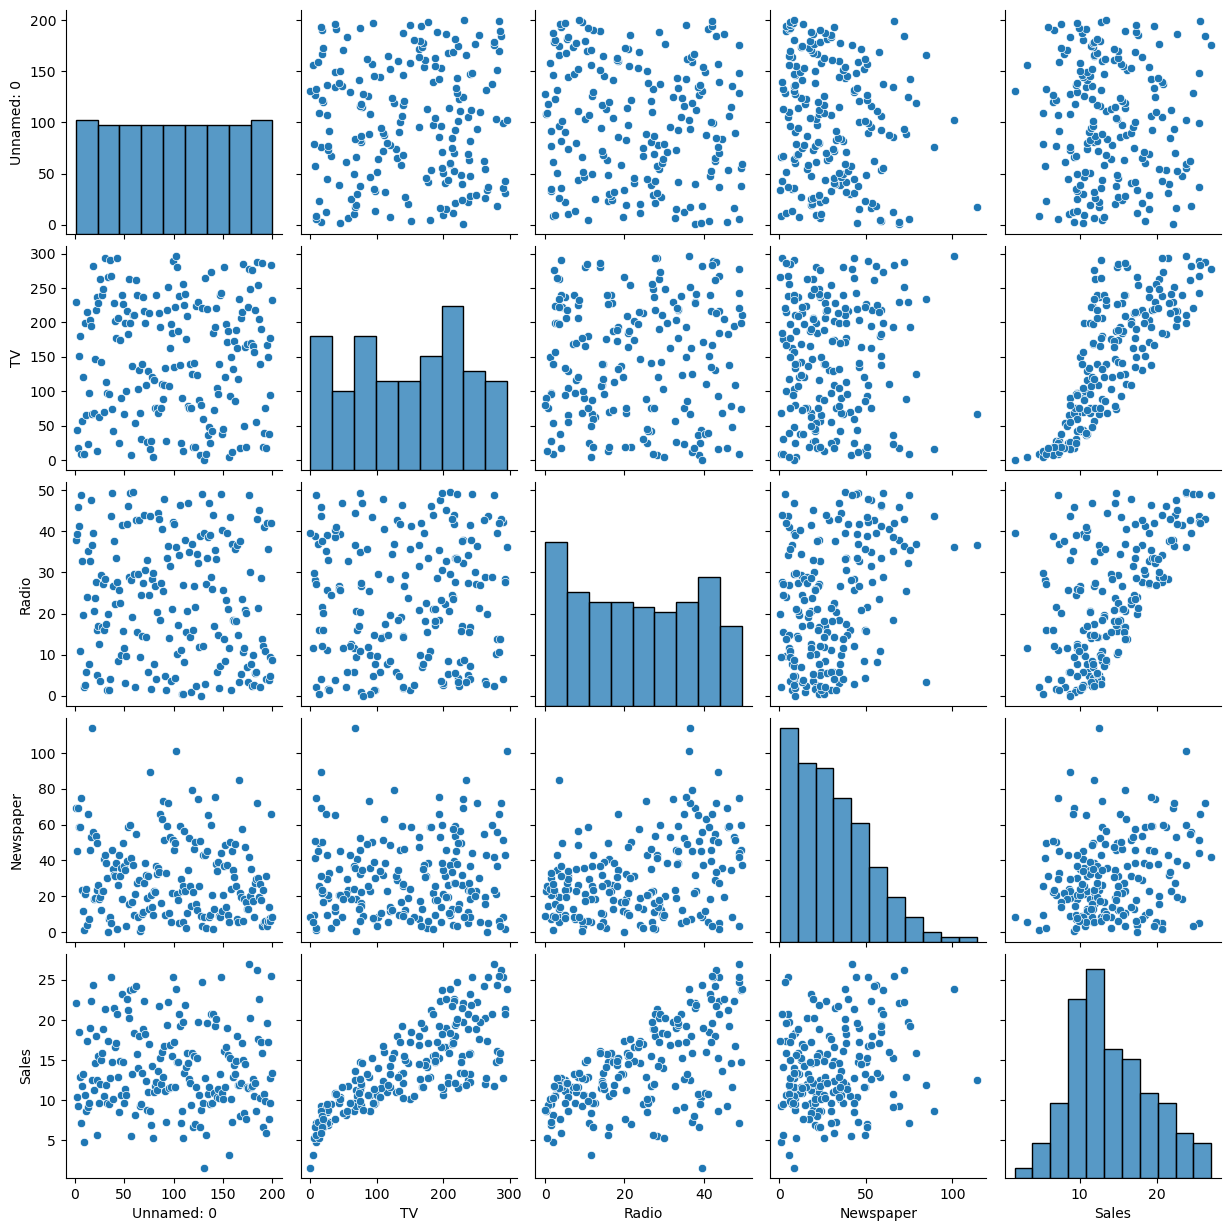

In [45]:
sns.pairplot(df)

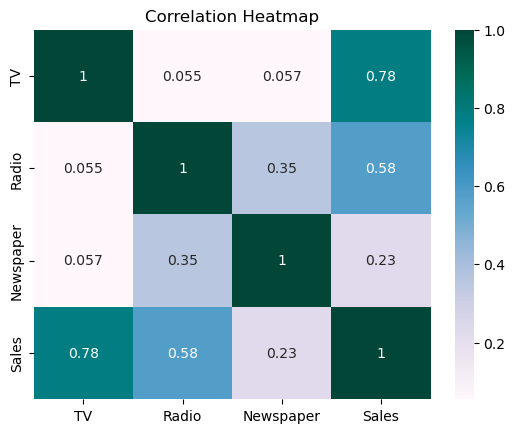

In [56]:
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='PuBuGn')
plt.title('Correlation Heatmap')
plt.show()

<a id="modeling"></a>
**5. Modeling**

In [69]:
X = df.drop(['Sales'], axis=1)
y = df["Sales"]

In [70]:
le = LabelEncoder()
y = le.fit_transform(y)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

160 160
40 40


In [75]:
# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)
CountVectorizer()
# Use the trained to create a document-term matrix from train and test sets
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

scaler = MinMaxScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id="lr"></a>
**5.1. Linear Regression**

In [76]:
model = LinearRegression()
model.fit(X_train,y_train)
y_train_pred =model.predict(X_train)
y_pred =model.predict(X_test)

In [78]:
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred), 2))
print("Mean Squared Error: ", round(mean_squared_error(y_test, y_pred), 2))
print("Root Mean Squared Error: ", round(math.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("R - Squared Score: ", round(100*r2_score(y_test, y_pred), 2))

Mean Absolute Error:  8.15
Mean Squared Error:  109.04
Root Mean Squared Error:  10.44
R - Squared Score:  91.36


<a id="dtr"></a>
**5.2. Decision Tree Regressor**

In [79]:
dec_tree_model = DecisionTreeRegressor(random_state=0)
dec_tree_model.fit(X_train,y_train)
y_train_pred = dec_tree_model.predict(X_train)
y_pred = dec_tree_model.predict(X_test)

In [80]:
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred), 2))
print("Mean Squared Error: ", round(mean_squared_error(y_test, y_pred), 2))
print("Root Mean Squared Error: ", round(math.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("R - Squared Score: ", round(100*r2_score(y_test, y_pred), 2))

Mean Absolute Error:  6.38
Mean Squared Error:  64.42
Root Mean Squared Error:  8.03
R - Squared Score:  94.9


<a id="rfr"></a>
**5.3. Random Forest Regressor**

In [81]:
Rf = RandomForestRegressor(n_estimators = 15, criterion = 'squared_error', random_state = 20, n_jobs = -1)
Rf.fit(X_train,y_train)
Rf_train_pred = Rf.predict(X_train)
Rf_testpred = Rf.predict(X_test)

In [82]:
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, Rf_testpred), 2))
print("Mean Squared Error: ", round(mean_squared_error(y_test, Rf_testpred), 2))
print("Root Mean Squared Error: ", round(math.sqrt(mean_squared_error(y_test, Rf_testpred)), 2))
print("R - Squared Score: ", round(100*r2_score(y_test, Rf_testpred), 2))

Mean Absolute Error:  4.61
Mean Squared Error:  28.13
Root Mean Squared Error:  5.3
R - Squared Score:  97.77


Text(0.5, 0, 'Errors')

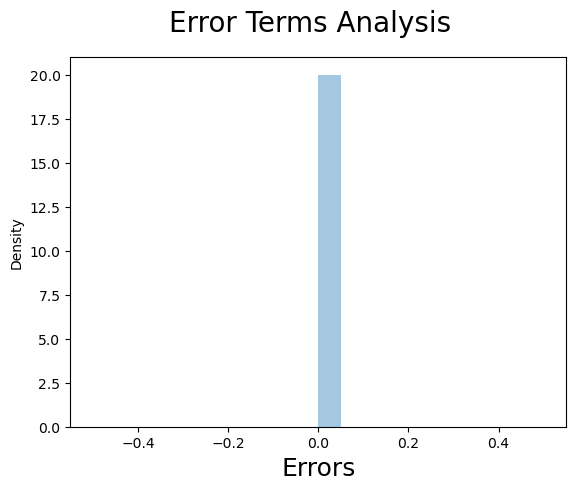

In [83]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

Text(0, 0.5, 'Rf_testpred')

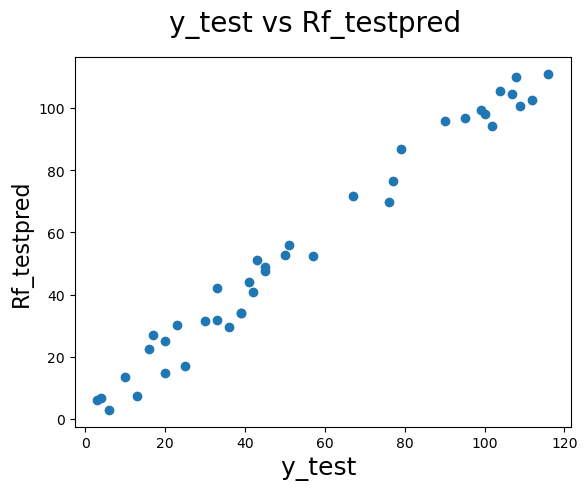

In [84]:
fig = plt.figure()
plt.scatter(y_test,Rf_testpred)
fig.suptitle('y_test vs Rf_testpred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('Rf_testpred', fontsize=16)

<a id="conclusion"></a>
**6. Task Conclusion - Predicting Sales**\
*In this project, I explored the fascinating world of Sales prediction using data science techniques. Through extensive data visualizations and the application of machine learning models including **Linear Regression, Decision Tree Regressor, and Random Forest Regressor**, I achieved remarkable **accuracy rates of 91.36%, 94.9%, and 97.77%** respectively. This journey exemplifies the power of data-driven insights in decoding complex sales of electronics.*